# **Chapter 3. 머신러닝 핵심 알고리즘**
## **3.1 지도학습**   

|구분|분류|회귀|
|------|---|---|
|데이터 유형|이산형 데이터|연속형 데이터|
|결과|훈련 데이터의 레이블 중 하나를 예측|연속된 값을 예측|
|예시|학습 데이터를 A, B, C 그룹 중 하나로 매핑|결과값이 어떤 값이든 나올 수 있음|
|    | ex. 스팸 메일 필터링|ex. 주가 분석 예측|   


<img src = "KakaoTalk_20210715_022900876.jpg">


### **3.1.1 K-최근접 이웃**
* **분류**문제로 직관적이며 사용하기 쉬움
* 데이터를 충분히 확보할 수 있을 때 사용

> 데이터 간의 거리를 **미리** 측정해둔 뒤, 새로운 데이터에 대해 분류작업


In [ ]:
# 라이브러리 호출 및 데이터 준비
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics # 모델의 성능 평가

# 열 이름 할당
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class'] 

# 데이터를 판다스 데이터프레임으로 저장
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/chap3/data/iris.data', names = names)

In [ ]:
# 훈련과 검증 데이터셋 분리
X = dataset.iloc[:, :-1].values # 모든 행 사용, 열은 뒤에서 하나만 제거
y = dataset.iloc[:, 4].values # 모든 행 사용, 열은 앞에서 다섯번째 값만 사용

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) # 검증 세트의 비율은 20%

from sklearn.preprocessing import StandardScaler
s = StandardScaler() # 특성 스케일링 (평균 0, 표준편차 1)
# 스케일링 적용
X_train = s.transform(X_train)
X_test = s.transform(X_test)

NotFittedError: ignored

In [ ]:
# 모델 생성 및 훈련
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 50) # K=50인 K-최근접 이웃모델 생성
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [ ]:
# 모델 정확도
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
print('정확도: {}'.format(accuracy_score(y_test, y_pred)))

정확도: 0.8666666666666667


In [ ]:
# 최적의 K 찾기
k = 10
acc_array = np.zeros(k)
for k in np.arange(1, k+1, 1):
    classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    acc_array[k-1] = acc

max_acc = np.amax(acc_array)
acc_list = list(acc_array)
k = acc_list.index(max_acc)
print('정확도', max_acc, '으로 최적의 k는', k+1, '입니다.')    

정확도 0.9666666666666667 으로 최적의 k는 1 입니다.


### **3.1.2 서포트 벡터 머신**
* 분류 모델로, 커널만 적절히 선택하면 정확도가 상당히 좋은 모델
* 텍스트 분류에 자주 사용됨
> 결정 경계와 서포트 벡터 사이의 거리(마진)이 멀수록 성능이 좋음
> * *서포트 벡터*: 결정 경계와 가까이 있는 데이터들

따라서, 결국 이상치를 잘 다루는 것이 중요함
* 이상치를 허용하지 않는 하드마진과,
* 어느 정도의 이상치들을 마진 안에 포함하는 소프트 마진이 있음


In [ ]:
# 라이브러리 호출
from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection
import tensorflow as tf
import os

# 로깅을 제어 (기본값은 0, 모든 로그가 표시)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [ ]:
# iris 데이터를 준비하고 훈련/검증 데이터셋으로 분리
iris = datasets.load_iris() # 사이킷런에서 제공하는 데이터셋
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data,
                                                                    iris.target,
                                                                    test_size = 0.6,
                                                                    random_state = 42)

In [ ]:
# SVM 모델에 대한 정확도
svm = svm.SVC(kernel = 'linear', C = 1.0, gamma = 0.5)
svm.fit(X_train, y_train) 
predictions = svm.predict(X_test)
score = metrics.accuracy_score(y_test, predictions)
print('정확도: {0:f}'.format(score))

AttributeError: ignored

SVM은 선형/비선형 분류를 지원함
> 비선형 문제는 저차원 데이터를 고차원으로 보내는 것으로 해결될 수 있지만, 특성의 개수가 늘어남에 따라 성능에 문제가 생길 수 있음
>> 이를 해결하고자 커널 트릭 (kernel trick) 도입

* 선형 커널(linear kernel): 선형으로 분류가 가능한 데이터에 적용함
* 가우시안 RBF 커널: 실제로 특성을 추가하지 않으면서도 다항식 특성을 많이 추가한 것과 같은 효과를 얻어 고차원으로 데이터 매핑이 가능 
* 다항식 커널: 다항식 커널의 확장 버전, 입력 벡터를 차원이 무한한 고차원으로 매핑함 (차수에 제한 X)

**C 값**은 오류를 어느 정도 허용할지 결정, 클수록 하드마진/ 작을수록 소프트마진   
**감마(gamma)**는 결정경계를 얼마나 유연하게 가져갈지 결정, 클수록 결정경계가 곡선을 띄며 과적합의 위험이 있음

### **3.1.3 결정 트리**
* 데이터 분류 문제로, 이상치가 많은 데이터셋에 사용하기 좋음
* 시각화가 가능하기 때문에 의사결정의 과정을 직접 살펴볼 수 있어 유용함

> 분류할수록 순도는 높아지고, 불순도 및 불확실성은 낮아짐 (정보획득)
>> 순도와 불순도   
>> ~~

* **불순도 계산 방법**
1. 엔트로피 (entropy)
> 불확실성을 수치화한 지표로, 이 수치가 높을수록 불확실성이 높은 것
>> 계산식: ~~
2. 지니계수 (Gini Index)
> 불순도를 측정하는 지표, 통계적 분산 정도를 정랼화해 표현한 값   
> 원소 n개 중에서 임의로 2개 추출시 이 값들이 서로 다른 그룹에 속해 있을 확률
>> 계산식: ~~   
>> 로그 계산을 할 필요가 없어 계산이 빠름


In [1]:
# 라이브러리 호출 및 데이터 준비
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/chap3/data/titanic/train.csv', index_col = 'PassengerId')
print(df.head())

             Survived  Pclass  ... Cabin Embarked
PassengerId                    ...               
1                   0       3  ...   NaN        S
2                   1       1  ...   C85        C
3                   1       3  ...   NaN        S
4                   1       1  ...  C123        S
5                   0       3  ...   NaN        S

[5 rows x 11 columns]


In [3]:
# 데이터 전처리
# 전체 데이터셋 중 필요한 열만 선택
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}) # 범주형 변수인 성별을 정수형으로 변환
df = df.dropna() # na 삭제
X = df.drop('Survived', axis = 1) # 열 삭제
y = df['Survived'] # 'Survived' 값을 예측 레이블로 사용

In [4]:
# 훈련과 검증 데이터셋으로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [5]:
# 결정 트리 모델 생성
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [6]:
# 모델 훈련
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [7]:
# 모델 예측
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict) # 실제값과 예측값 간의 정확도 점수

0.8268156424581006

In [10]:
# 혼동 행렬을 이용한 성능 측정
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns = ['Predicted Not Survival', 'Predicted Survival'],
    index = ['True Not Survival', 'True Survival']
)

,Predicted Not Survival,Predicted Survival
True Not Survival,98,14
True Survival,17,50


* **혼동행렬**
> 알고리즘 성능 평가에 사용됨   
> 2장에서 다룬 것과 같이 TP, TN, FP, FN으로부터 정밀도, 재현율, 정확도와 같은 지표를 얻을 수 있음

### **3.1.4 로지스틱 회귀와 선형 회귀**
* **독립 변수 (예측 변수)**: 영향을 미칠 것으로 예상되는 변수 (x)
* **종속 변수 (기준 변수)**: 영향을 받을 것으로 예상되는 변수 (y)

   
--------
 #### **로지스틱 회귀**
* 분류 알고리즘으로, 데이터셋의 분류 결과에 대해 확신이 없거나 향후 추가 데이터셋이 투입될 수 있는 상황에서 사용됨
* 개별 관측치들이 어느 집단에 분류될 수 있는지 분석하고 예측하는 모형으로, 일반적인 회귀 분석과는 차이가 있음

|구분|일반적인 회귀 분석|로지스틱 회귀 분석|
|------|---|---|
|종속 변수|연속형 변수|이산형 변수|
|모형 탐색 방법|최소제곱법|최대우도법|
|모델 검정|F-테스트, t-테스트|X^2 테스트|

-----------
#### **최소제곱법과 최대우도법**
최소제곱법(Mean Squared Error)는 일반 회귀 분석에서, 최대우도법(Maximum Likelihood)는 로지스틱 회귀분석에서 사용됨
* 최소제곱법(MSE): 실제 값에서 예측 값을 뺀 후 제곱해서 구함 (=평균제곱오차)
* 최대우도법: 가설마다 계산된 우도(가능도) 값 중 가장 큰 값을 선택
> 수식: ~~
>> 고정된 X, Y에 대해 모델에 X를 넣었을 때, 실제 값 Y에 가장 가까운 파라미터(theta)를 찾는 수식   
>>> 2번 식은 언더플로 방지를 위해 우도에 로그를 취한 추정식

In [13]:
# 라이브러리 호출 및 데이터 준비
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits() # 사이킷런에서 제공

print('Image Data Shape', digits.data.shape)
print('Label Data Shape', digits.target.shape) # 1797개의 이미지 데이터, 8*8(=64) 차원의 데이터셋

Image Data Shape (1797, 64)
Label Data Shape (1797,)


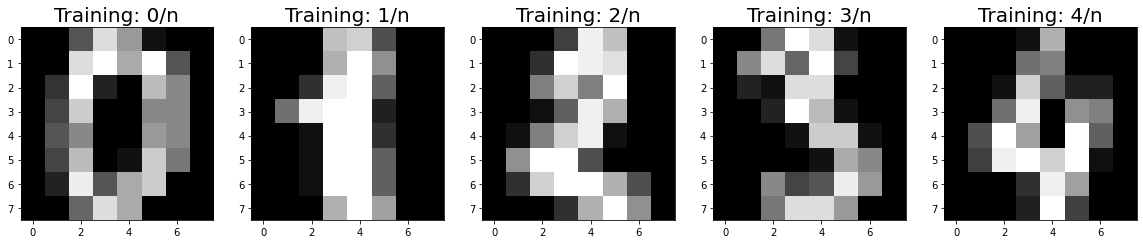

In [15]:
# digits 데이터셋의 시각화
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 4))
# 예시로 이미지 5개만 확인
# zip 함수는 두 요소를 엮어주는 역할
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (8, 8)), cmap = plt.cm.gray)
    plt.title('Training: %i/n' % label, fontsize = 20)

In [19]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [20]:
# 훈련과 검증 데이터셋 분리 및 로지스틱 회귀 모델 생성
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    test_size = 0.25, random_state = 0)

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression() # 로지스틱 회귀 모델의 인스턴스 생성
logisticRegr.fit(x_train, y_train) # 훈련

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# 일부 데이터를 사용한 모델 예측
logisticRegr.predict(x_test[0].reshape(1, -1))
logisticRegr.predict(x_test[0:10]) # 10개의 이미지를 활용한 예측 결과

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [23]:
# 전체 데이터를 사용한 모델 예측
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


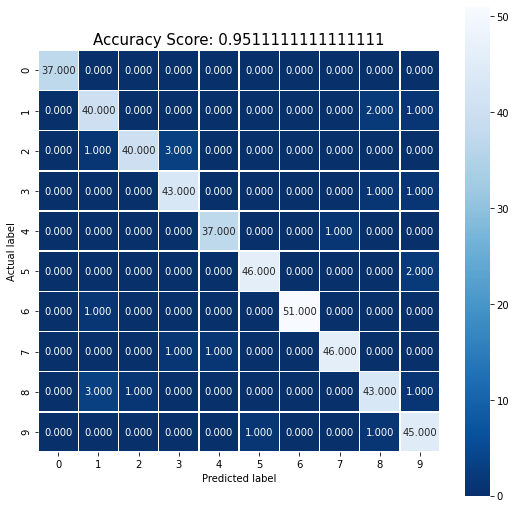

In [26]:
# 혼동 행렬 시각화
import numpy as np
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize = (9, 9))
sns.heatmap(cm, annot = True, fmt = '.3f', linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label') # y축
plt.xlabel('Predicted label') # x축
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show();

실제 1~10의 숫자 (label)를 얼마나 정확하게 예측했는지는 혼동행렬의 대각성분을 통해 확인할 수 있음   
> 혼동 행렬은 결과 확인용으로는 좋지만 직관적인 이해를 하기엔 난해함

------------------
#### **선형회귀**
* 데이터 분류문제에 사용되는 알고리즘으로, 독립변수와 종속변수가 선형관계에 있을 때 유용함  
* 복잡한 연산과정이 없어서 컴퓨팅 성능이 낮을 때 유용

> 설명변수 하나로 예측하는 경우: 단순 선형 회귀, 설명변수 여러개로 예측하는 경우: 다중 선형 회귀
>> 로지스틱 회귀는 S-curve를 출력하는데 반해, 일반 회귀는 직선식을 출력함 
>>> 그림~~


In [27]:
# 라이브러리 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline # 실행한 브라우저에서 바로 결과물을 확인할 수 있도록 함

In [28]:
# weather.csv 파일 불러오기
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/chap3/data/weather.csv')

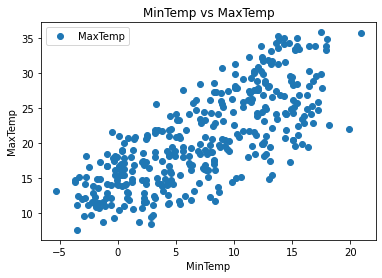

In [29]:
# 데이터 간 관계를 시각화로 표현
dataset.plot(x='MinTemp', y = 'MaxTemp', style ='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [35]:
# 데이터를 독립 변수와 종속 변수로 분리하고 선형 회귀 모델 생성
X = dataset['MinTemp'].values.reshape(-1, 1)
y = dataset['MaxTemp'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# 회귀 모델에 대한 예측
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()}) # flatten은 여러 행렬의 함수를 하나의 행 or 열로 만들어주는 함수
df

,Actual,Predicted
0,17.6,21.483389
1,12.8,16.359386
2,9.7,12.430984
3,28.5,21.483389
4,14.8,13.114185
...,...,...
69,15.0,17.298787
70,26.5,25.753392
71,15.1,21.056389
72,20.6,15.590786


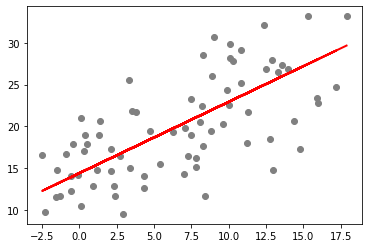

In [39]:
# 검증된 데이터셋을 사용한 회귀선 표현
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, y_pred, color = 'red', linewidth = 2)
plt.show()

실제 데이터와 비슷한 회귀선으로 도출됨

In [45]:
# 선형 회귀 모델 평가
print('평균제곱법:', metrics.mean_squared_error(y_test, y_pred))
print('루트 평균제곱법', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

평균제곱법: 20.124980699880336
루트 평균제곱법 4.486087460123836
